In [1]:
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')

import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df1 = pd.read_csv("/content/drive/My Drive/PORTOFOLIO/SENTIMENT ANALYSIS/SHIN TAE YONG DISMISSAL/sty.csv")
display(df1)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1876418462299631668,Mon Jan 06 23:59:58 +0000 2025,0,Kalau melihat rekam jejak kepelatihan Patrick ...,1876418462299631668,NaN,NaN,in,"Jakarta, Indonesia",0,0,0,https://x.com/LayarPixel/status/18764184622996...,72466001,LayarPixel
1,1876275930706170255,Mon Jan 06 23:59:56 +0000 2025,4,@kapulagaoreo terima kasih sudah diingatkan se...,1876418456587002351,NaN,kapulagaoreo,in,NaN,0,0,0,https://x.com/situmejik/status/187641845658700...,1315474206071517184,situmejik
2,1876196713683399100,Mon Jan 06 23:59:54 +0000 2025,3,@pechdrink Justru kalo seandainya (amit2) timn...,1876418446172594560,NaN,pechdrink,in,Balikpapan - Manchester,0,0,0,https://x.com/muammarfadhilah/status/187641844...,554873150,muammarfadhilah
3,1876133493513839092,Mon Jan 06 23:59:54 +0000 2025,1,@idextratime Nih guys sosok pengganti sty suda...,1876418445098860562,NaN,idextratime,in,NaN,0,0,0,https://x.com/ArduZahor5914/status/18764184450...,1853985837052215296,ArduZahor5914
4,1876418418553086375,Mon Jan 06 23:59:47 +0000 2025,8,kenapa STY dipecat padahal yang gabisa kerja k...,1876418418553086375,NaN,NaN,in,Bandung,0,1,1,https://x.com/olraitbro/status/187641841855308...,828811598282100736,olraitbro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,1876168400608911551,Mon Jan 06 22:37:03 +0000 2025,0,@idextratime Daripada @PSSI dan pak @erickthoh...,1876397597944095139,NaN,idextratime,in,"DKI Jakarta, Indonesia",0,0,0,https://x.com/denbagus_dl/status/1876397597944...,1493369877742391298,denbagus_dl
455,1876309311280095520,Mon Jan 06 22:36:59 +0000 2025,2,@appletomdr @GOAL_ID Semisal netizen pada mara...,1876397579845689623,NaN,appletomdr,in,tiotama,0,0,0,https://x.com/anggraytama/status/1876397579845...,365995505,anggraytama
456,1876397550091272406,Mon Jan 06 22:36:52 +0000 2025,0,STY njenengan tiang sae,1876397550091272406,NaN,NaN,in,NaN,0,0,0,https://x.com/snoopybecool_/status/18763975500...,1074265338718507008,snoopybecool_
457,1876397516155171166,Mon Jan 06 22:36:44 +0000 2025,0,STY OUT = timnas kembali ke setelan pabrik,1876397516155171166,NaN,NaN,in,NaN,0,0,0,https://x.com/Fzn_Hnd/status/1876397516155171166,1843497973021609984,Fzn_Hnd


In [3]:
df2 = pd.read_csv("/content/drive/My Drive/PORTOFOLIO/SENTIMENT ANALYSIS/SHIN TAE YONG DISMISSAL/sty2.csv")
display(df2)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1876418359589568864,Mon Jan 06 23:59:33 +0000 2025,0,Ketika msk R3 Kualifikasi Piala Dunia 2026 sem...,1876418359589568864,NaN,NaN,in,"Kota Surabaya, Jawa Timur",0,1,0,https://x.com/Alfan_Edogawa/status/18764183595...,321298455,Alfan_Edogawa
1,1876418077535166637,Mon Jan 06 23:58:26 +0000 2025,0,ini cerita shin tae-yong dipecat sedihnya ngal...,1876418077535166637,NaN,NaN,in,bks,0,1,0,https://x.com/insinyurhebat/status/18764180775...,747901896,insinyurhebat
2,1876327231330652369,Mon Jan 06 23:57:56 +0000 2025,2,@aingriwehuy Pecat Shin Tae-yong dari Timnas I...,1876417952020615635,NaN,aingriwehuy,in,Jakarta,0,2,1,https://x.com/okezonenews/status/1876417952020...,47274731,okezonenews
3,1876254726637187350,Mon Jan 06 23:57:48 +0000 2025,42,@aingriwehuy Pecat Shin Tae-yong dari Timnas I...,1876417916612333758,NaN,aingriwehuy,in,Jakarta,2,5,6,https://x.com/okezonenews/status/1876417916612...,47274731,okezonenews
4,1876417676492624117,Mon Jan 06 23:56:50 +0000 2025,1,Pecat Shin Tae-yong dari Timnas Indonesia PSSI...,1876417676492624117,NaN,NaN,in,Jakarta,0,0,0,https://x.com/okezonenews/status/1876417676492...,47274731,okezonenews
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,1876267439085801926,Mon Jan 06 13:59:51 +0000 2025,0,Siapakah Penngganti Shin Tae-yong? Patrick Klu...,1876267439085801926,NaN,NaN,in,Indonesia,0,0,0,https://x.com/seatodaynews/status/187626743908...,1314830750533865472,seatodaynews
421,1876267304117526548,Mon Jan 06 13:59:19 +0000 2025,20,Shin Tae-yong Dipecat Habis Manis Sepah Dibuan...,1876267304117526548,NaN,NaN,in,NaN,0,0,17,https://x.com/OposisiCerdas/status/18762673041...,887743587579944960,OposisiCerdas
422,1876267280251949327,Mon Jan 06 13:59:13 +0000 2025,0,Suara Kesedihan Selebritas Indonesia atas Peme...,1876267280251949327,NaN,NaN,in,NaN,0,0,0,https://x.com/toni071982/status/18762672802519...,1056903218574151681,toni071982
423,1876267227986768097,Mon Jan 06 13:59:01 +0000 2025,1,Terima kasih Shin Tae-yong atas dedikasi dan ...,1876267227986768097,https://pbs.twimg.com/media/GgnWwOKbQAAXZr_.jpg,NaN,in,"Philadelphia, PA",0,0,1,https://x.com/itsrealllblue/status/18762672279...,1329682875751440384,itsrealllblue


In [4]:
df_combined = pd.concat([df1, df2], ignore_index=True)
display(df_combined)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1876418462299631668,Mon Jan 06 23:59:58 +0000 2025,0,Kalau melihat rekam jejak kepelatihan Patrick ...,1876418462299631668,NaN,NaN,in,"Jakarta, Indonesia",0,0,0,https://x.com/LayarPixel/status/18764184622996...,72466001,LayarPixel
1,1876275930706170255,Mon Jan 06 23:59:56 +0000 2025,4,@kapulagaoreo terima kasih sudah diingatkan se...,1876418456587002351,NaN,kapulagaoreo,in,NaN,0,0,0,https://x.com/situmejik/status/187641845658700...,1315474206071517184,situmejik
2,1876196713683399100,Mon Jan 06 23:59:54 +0000 2025,3,@pechdrink Justru kalo seandainya (amit2) timn...,1876418446172594560,NaN,pechdrink,in,Balikpapan - Manchester,0,0,0,https://x.com/muammarfadhilah/status/187641844...,554873150,muammarfadhilah
3,1876133493513839092,Mon Jan 06 23:59:54 +0000 2025,1,@idextratime Nih guys sosok pengganti sty suda...,1876418445098860562,NaN,idextratime,in,NaN,0,0,0,https://x.com/ArduZahor5914/status/18764184450...,1853985837052215296,ArduZahor5914
4,1876418418553086375,Mon Jan 06 23:59:47 +0000 2025,8,kenapa STY dipecat padahal yang gabisa kerja k...,1876418418553086375,NaN,NaN,in,Bandung,0,1,1,https://x.com/olraitbro/status/187641841855308...,828811598282100736,olraitbro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,1876267439085801926,Mon Jan 06 13:59:51 +0000 2025,0,Siapakah Penngganti Shin Tae-yong? Patrick Klu...,1876267439085801926,NaN,NaN,in,Indonesia,0,0,0,https://x.com/seatodaynews/status/187626743908...,1314830750533865472,seatodaynews
880,1876267304117526548,Mon Jan 06 13:59:19 +0000 2025,20,Shin Tae-yong Dipecat Habis Manis Sepah Dibuan...,1876267304117526548,NaN,NaN,in,NaN,0,0,17,https://x.com/OposisiCerdas/status/18762673041...,887743587579944960,OposisiCerdas
881,1876267280251949327,Mon Jan 06 13:59:13 +0000 2025,0,Suara Kesedihan Selebritas Indonesia atas Peme...,1876267280251949327,NaN,NaN,in,NaN,0,0,0,https://x.com/toni071982/status/18762672802519...,1056903218574151681,toni071982
882,1876267227986768097,Mon Jan 06 13:59:01 +0000 2025,1,Terima kasih Shin Tae-yong atas dedikasi dan ...,1876267227986768097,https://pbs.twimg.com/media/GgnWwOKbQAAXZr_.jpg,NaN,in,"Philadelphia, PA",0,0,1,https://x.com/itsrealllblue/status/18762672279...,1329682875751440384,itsrealllblue


In [5]:
filtered_df = df_combined.loc[:, ['full_text']]
display(filtered_df)

,full_text
0,Kalau melihat rekam jejak kepelatihan Patrick ...
1,@kapulagaoreo terima kasih sudah diingatkan se...
2,@pechdrink Justru kalo seandainya (amit2) timn...
3,@idextratime Nih guys sosok pengganti sty suda...
4,kenapa STY dipecat padahal yang gabisa kerja k...
...,...
879,Siapakah Penngganti Shin Tae-yong? Patrick Klu...
880,Shin Tae-yong Dipecat Habis Manis Sepah Dibuan...
881,Suara Kesedihan Selebritas Indonesia atas Peme...
882,Terima kasih Shin Tae-yong atas dedikasi dan ...


In [6]:
def preprocess_tweet(sen):
    sentence = sen.lower()

    sentence = re.sub('RT @\w+: '," ", sentence)

    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)

    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [7]:
cleaned_tweets = []

for tweet in filtered_df['full_text']:
  cleaned_tweet = preprocess_tweet(tweet)
  cleaned_tweets.append(cleaned_tweet)

filtered_df['full_text'] = cleaned_tweets
display(filtered_df)

,full_text
0,kalau melihat rekam jejak kepelatihan patrick ...
1,terima kasih sudah diingatkan selama ini timn...
2,justru kalo seandainya amit2 timnas kalah sam...
3,nih guys sosok pengganti sty sudah tiba di ja...
4,kenapa sty dipecat padahal yang gabisa kerja k...
...,...
879,siapakah penngganti shin tae yong patrick klui...
880,shin tae yong dipecat habis manis sepah dibuang
881,suara kesedihan selebritas indonesia atas peme...
882,terima kasih shin tae yong atas dedikasi dan ...


In [8]:
!pip install googletrans==4.0.0-rc1
from googletrans import Translator

translator = Translator()

def translate_to_english(text):
  try:
    translation = translator.translate(text, dest='en')
    return translation.text
  except Exception as e:
    print(f"Error translating: {e}")
    return text

filtered_df['english_text'] = filtered_df['full_text'].apply(translate_to_english)

display(filtered_df)

,full_text,english_text
0,kalau melihat rekam jejak kepelatihan patrick ...,If you look at the track record of Patrick Klu...
1,terima kasih sudah diingatkan selama ini timn...,Thank you for being reminded that the national...
2,justru kalo seandainya amit2 timnas kalah sam...,"In fact, if the Amit2 of the national team los..."
3,nih guys sosok pengganti sty sudah tiba di ja...,here guys the replacement figure of Sty has ar...
4,kenapa sty dipecat padahal yang gabisa kerja k...,Why is Sty fired even though the one who can't...
...,...,...
879,siapakah penngganti shin tae yong patrick klui...,Who is Shin Tae Yong Patrick Kluivert and Giov...
880,shin tae yong dipecat habis manis sepah dibuang,Shin Tae Yong was fired as sweet as a
881,suara kesedihan selebritas indonesia atas peme...,The sound of the sadness of Indonesian celebri...
882,terima kasih shin tae yong atas dedikasi dan ...,Thank you Shin Tae Yong for the dedication and...


In [9]:
filtered_df.to_csv('filtered_df.csv', index=False)

In [12]:
filtered_df[['polarity', 'subjectivity']] = filtered_df['english_text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in filtered_df['english_text'].items():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        filtered_df.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        filtered_df.loc[index, 'sentiment'] = "positive"
    else:
        filtered_df.loc[index, 'sentiment'] = "neutral"
    filtered_df.loc[index, 'neg'] = neg
    filtered_df.loc[index, 'neu'] = neu
    filtered_df.loc[index, 'pos'] = pos
    filtered_df.loc[index, 'compound'] = comp

In [13]:
display(filtered_df)

,full_text,english_text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,kalau melihat rekam jejak kepelatihan patrick ...,If you look at the track record of Patrick Klu...,0.061111,0.744444,positive,0.066,0.825,0.109,0.3182
1,terima kasih sudah diingatkan selama ini timn...,Thank you for being reminded that the national...,-0.500000,0.900000,negative,0.221,0.730,0.049,-0.8271
2,justru kalo seandainya amit2 timnas kalah sam...,"In fact, if the Amit2 of the national team los...",-0.056818,0.727273,neutral,0.129,0.758,0.113,0.0433
3,nih guys sosok pengganti sty sudah tiba di ja...,here guys the replacement figure of Sty has ar...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,kenapa sty dipecat padahal yang gabisa kerja k...,Why is Sty fired even though the one who can't...,0.000000,0.000000,negative,0.217,0.783,0.000,-0.5574
...,...,...,...,...,...,...,...,...,...
879,siapakah penngganti shin tae yong patrick klui...,Who is Shin Tae Yong Patrick Kluivert and Giov...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
880,shin tae yong dipecat habis manis sepah dibuang,Shin Tae Yong was fired as sweet as a,0.350000,0.650000,negative,0.286,0.476,0.238,-0.1531
881,suara kesedihan selebritas indonesia atas peme...,The sound of the sadness of Indonesian celebri...,0.400000,0.400000,negative,0.172,0.828,0.000,-0.4404
882,terima kasih shin tae yong atas dedikasi dan ...,Thank you Shin Tae Yong for the dedication and...,0.268939,0.519242,positive,0.077,0.689,0.234,0.8176


In [16]:
def sentiment_counts(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [17]:
sentiment_counts(filtered_df,"sentiment")

,Total,Percentage
sentiment,,
positive,359,40.61
negative,343,38.80
neutral,182,20.59


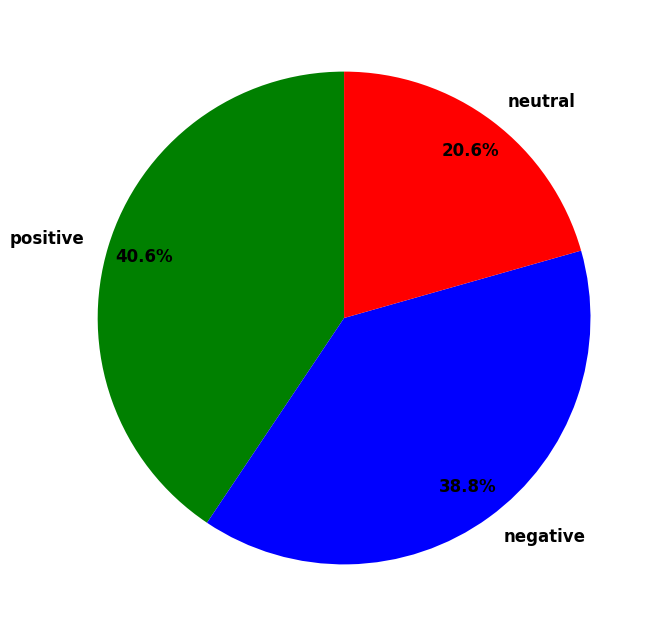

In [19]:
pichart = sentiment_counts(filtered_df,"sentiment")

names = pichart.index
size = pichart["Percentage"]

plt.figure(figsize=(8, 8))
plt.pie(size, labels=names, colors=['green', 'blue', 'red'],
        autopct='%1.1f%%', startangle=90, pctdistance=0.85,
        textprops={'fontsize': 12, 'weight': 'bold'})

centre_circle = plt.Circle((0, 0), 0.70, color='white')
fig = plt.gcf()

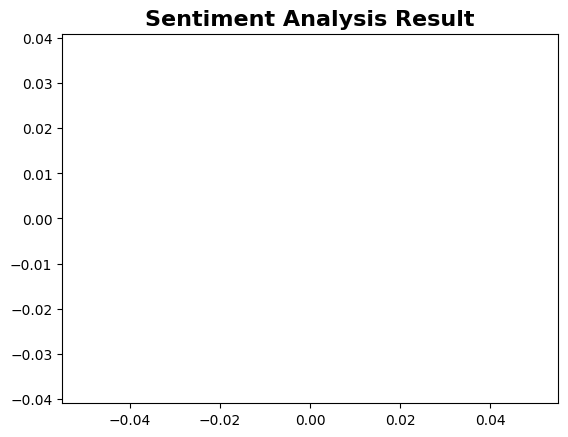

There are 118280 words in the combination of all review.


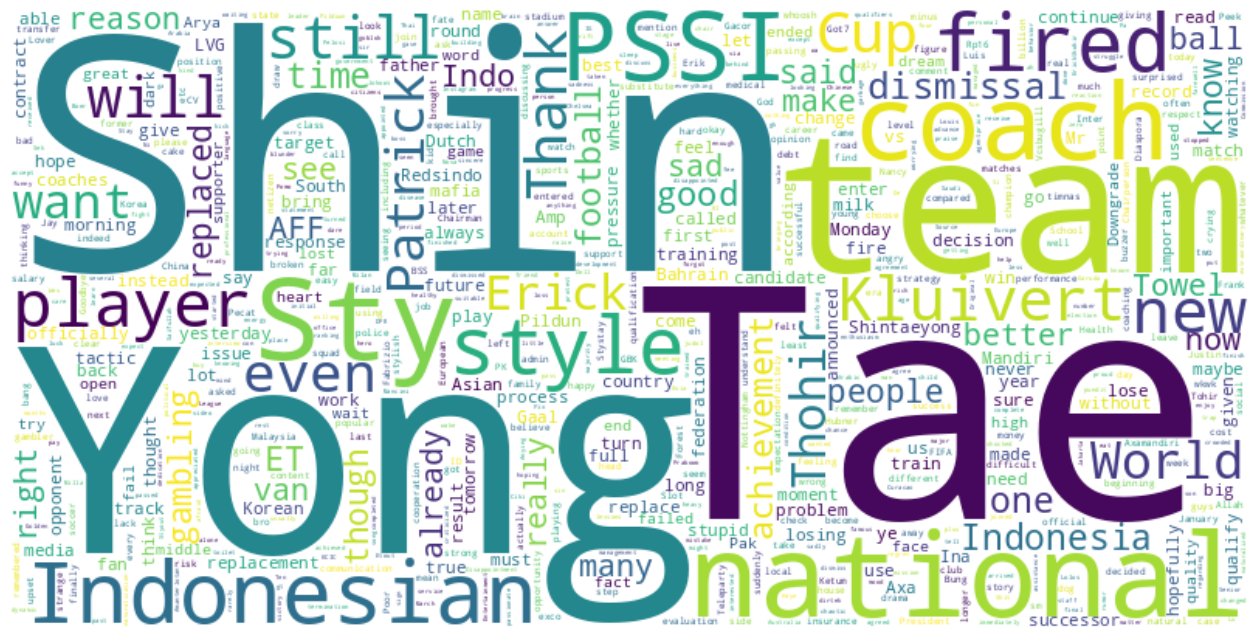

In [20]:
fig.gca().add_artist(centre_circle)

plt.title('Sentiment Analysis Result', fontsize=16, fontweight='bold')

plt.axis('equal')
plt.show()

text = " ".join(review for review in filtered_df.english_text)
print ("There are {} words in the combination of all review.".format(len(text)))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color="white",stopwords=stopwords,max_words=1000,width=800,height=400,collocations=False).generate(text)

plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()